![Deep Learning for Scientists in a hurry](./fig/Title.png)

In [1]:
%load_ext watermark

In [2]:
%watermark

Last updated: 2022-08-09T14:40:20.924804-04:00

Python implementation: CPython
Python version       : 3.10.5
IPython version      : 8.4.0

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 3.10.0-1160.24.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 40
Architecture: 64bit



In [3]:
import time
start = time.time()
chapter_number = 5
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

In [4]:
from distutils.spawn import find_executable
has_latex = False
if find_executable('latex'):
    print("latex installed")
    has_latex = True
else:
    print("latex is not installed")
    has_latex = False

latex is not installed


In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn
import scipy

In [6]:
%watermark -iv

numpy     : 1.23.1
scipy     : 1.9.0
pandas    : 1.4.3
sklearn   : 1.1.2
matplotlib: 3.5.2



# Mathematical Building Blocks of Neural Networks

Neural Networks uses massive amounts of very simple mathematical procedures. The purpose here is to understand the mathematical concepts behind neural networks at least to the level where you can follow what those neural networks are doing. Here we will elaborate a set of disconnected concepts mathematical concepts and link those in the context of building neural networks.

## Functions

A neural network is a function. A function is a mapping that takes an input and returns an ouput. The neural networks that we are working here are deterministic, ie, they always return the same output when presented with the same input. There are some other cases where this is relaxed by introducing some stochastic behavior inside the network.

We are working with functions permanenty in neural networks so we need to explore a bit on them.

Lets start with a line. We saw on our previos section the central role of equations like 

$$f(\vec{x}) = \sum w_i x_i + b_i$$

They are just one of the simplest functions we can think about.

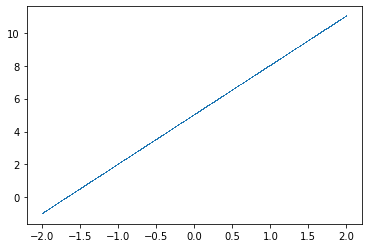

In [7]:
x = np.linspace(-2,2,1000)
y = 3.0 * x + 5
plt.plot(x,y,',');

We can also define functions that are not continuous

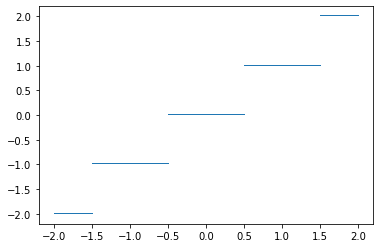

In [8]:
y = np.round(x)
plt.plot(x,y,',');

There are a series of functions of importance in Neural Networks. We saw that a neural network contain layers, and in its dense form those layers are just applying a linear operation shown above. The non-linearity comes from other functions called activation functions.

# Activation Functions

Activation functions are functions that operate over the output of a layer. There are several purposes for them. Introduce non-linearity which will give the network the ability to produce a much richer transformation to the input and to filter some of the outputs. 

Neurons apply activation functions at the end of the application of weights and biases. 
Activation functions are typically non-linear.

There are countless possibilities usually variations of two main ones:

### The Sigmoid function 

It produces a value between 0 and 1, so it is intuitive when a probability is desired, and was almost standard for many years.

### The Rectified Linear activation function (ReLU)

This function returns zero when the input is negative and returns the same value when the input is positive.

Rectified Linear activation functions are currently the most popular activation function as they are more efficient than the sigmoid or hyperbolic tangent.

There are several reason why ReLU could be more efficient in many cases:

  1. **Sparse activation**: In a randomly initialized network, only 50% of hidden units are active.
  
  1. **Better gradient propagation**: Fewer vanishing gradient problems compared to sigmoidal activation functions that saturate in both directions.
  
  1. **Efficient computation**: Only comparison, maybe addition and multiplication for variants.
  
There are **Leaky** and **Noisy** variants that are used on special cases.

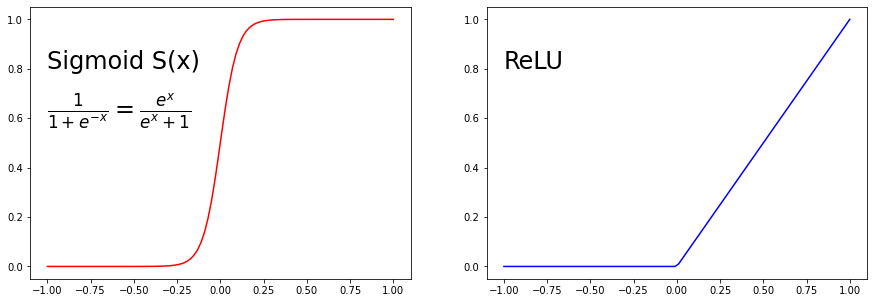

In [9]:
def sigmoid(x, x0, alpha):
    return 1. / (1. + np.exp(- (x - x0) / alpha))

def relu(x, alpha):
    return np.maximum(x, 0)

# define the curves
x = np.linspace(-1, 1, 100)
y1 = sigmoid(x, 0, 0.05)

y2 = relu(x, 0.05)

# draw the curves
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].plot(x, y1, c='red')
axs[0].text(-1, 0.8, "Sigmoid S(x)", fontsize=24)
eq1 = (r"$\frac{1}{1 + e^{-x}} = \frac{e^x}{e^x + 1}$")

axs[0].text(-1, 0.6, eq1, fontsize=24)
axs[1].plot(x, y2, c='blue')
axs[1].text(-1, 0.8, "ReLU", fontsize=24)
plt.savefig("Sigmoid+ReLU.pdf")

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

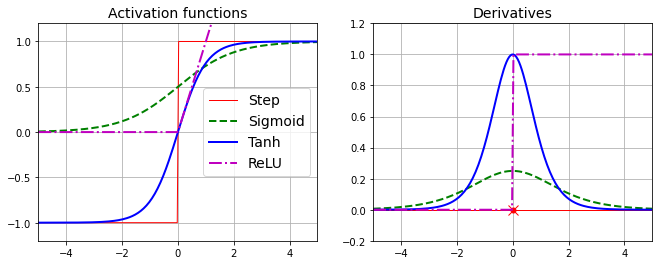

In [11]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2]);

In [12]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

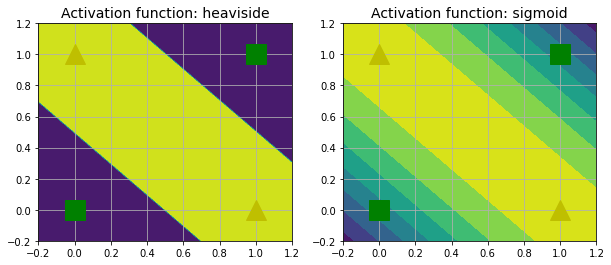

In [13]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [14]:
def logit(z):
    return 1 / (1 + np.exp(-z))

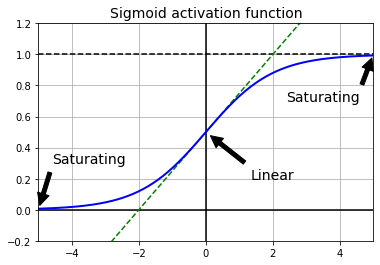

In [15]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2]);

There are many more, usually variations of these two with properties that allow better results or faster convergence.
We will see more of them for the particular case of TensorFlow.

## The process of Inference and Matrix operations

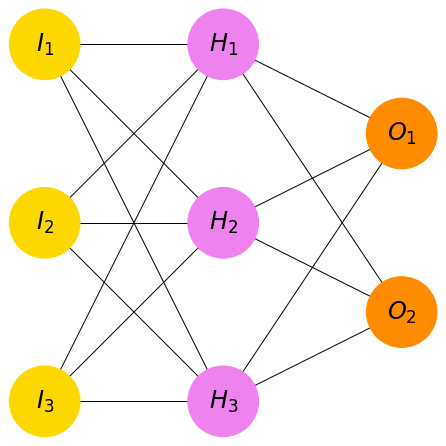

In [16]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx

subset_sizes = [3, 3, 2]
subset_color = [
    "gold",
    "violet",
    "darkorange",
]


def multilayered_graph(*subset_sizes):
    extents = nx.utils.pairwise(itertools.accumulate((0,) + subset_sizes))
    layers = [range(start, end) for start, end in extents]
    G = nx.Graph()
    for (i, layer) in enumerate(layers):
        G.add_nodes_from(layer, layer=i)
    for layer1, layer2 in nx.utils.pairwise(layers):
        G.add_edges_from(itertools.product(layer1, layer2))
    return G, layers


G, layers = multilayered_graph(*subset_sizes)

mapping = {0: r"$I_1$", 1: r"$I_2$", 2: r"$I_3$", 3: "$H_1$", 4: "$H_2$", 5: "$H_3$", 6: "$O_1$", 7: "$O_2$"}
H = nx.relabel_nodes(G, mapping, copy=False)

color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]
pos = nx.multipartite_layout(G, subset_key="layer")

plt.figure(figsize=(6, 6))
nx.draw(G, pos, node_color=color, with_labels=True, node_size=5000, font_size=24)
plt.axis("equal")
plt.show()

Lets assume that the 3 inputs from our neural network have the following values:

In [17]:
I = np.array([0.5, 0.9, -0.3])

We have 3 neurons on our hidden layer $H$. Each one of them receives the 3 inputs and will compute the function:
    
$$f(\vec{x}) = \sum_{i=1}^N w_i x_i + b_i$$

or using the convenction of promoting b_i as a weight which input is always 1

$$f(\vec{x}) = \sum_{i=0}^N w_i x_i$$

Lets see how that works in practice. Lets put some values to the weights in our hidden layer. We need 12 values, 4 for each node, those are the optimizable parameters.

In [18]:
H1_w = [1.0, -2.0, 2.0] 
H2_w = [2.0, 1.0, -4.0] 
H3_w = [1.0, -1.0, 0.0]

H1_b = 0
H2_b = 0
H3_b = 0

In [19]:
H_1 = np.array([H1_b] + H1_w)
H_1

array([ 0.,  1., -2.,  2.])

In [20]:
H_2 = np.array([H2_b] + H2_w)
H_2

array([ 0.,  2.,  1., -4.])

In [21]:
H_3 = np.array([H3_b] + H3_w)
H_3

array([ 0.,  1., -1.,  0.])

Now we can use the inputs and the weights to compute the result of the linear function for each node.
We will use the convection and enhance our input with an extra entry with value 1 it will be the first value, consistent with the location of our bias also on the first location of our weights.

In [22]:
I_c = np.concatenate(([1],I))
I_c

array([ 1. ,  0.5,  0.9, -0.3])

What we need to do is to compute the product of $I_c$ with each vector $H_1$, $H_2$ and $H_3$, and compute the sum of the products. 

In mathematics there is an operation that produces all that. Is called the dot product with vectors.

$$a \cdot b = \sum a_i b_i$$

The result of a dot product is a scalar. 

In vector algebra, the dot product can be defined for two vectors X and Y by

$$\vec{X} \cdot \vec{Y} = |\vec{X}||\vec{Y}| \cos(\theta)$$, 

This give us the idea of a weighted projection of one vector over other.

In NumPy we have the `numpy.dot` for computing this operation.

In [23]:
np.dot(I_c, H_1)

-1.9

In [24]:
np.dot(I_c, H_2)

3.0999999999999996

In [25]:
np.dot(I_c, H_3)

-0.4

There is another way of getting this result. If we stach the 3 vectors H_1 H2 and H_3 as columns of a matrix H we can compute the same operation using another usual operation in Linear Algebra. The vector operation of a rank-1 tensor with a rank-2 tensor, in simple terms, the dot product of a row vector with a matrix.



In [26]:
H = np.vstack((H_1,H_2,H_3)).T
H

array([[ 0.,  0.,  0.],
       [ 1.,  2.,  1.],
       [-2.,  1., -1.],
       [ 2., -4.,  0.]])

Lets reshape $I_c$ into a proper array with 1 row and 4 columns.

In [28]:
I_c.shape=(1,4)
I_c

array([[ 1. ,  0.5,  0.9, -0.3]])

If $A$ is an $m \times n$ matrix and $B$ is an $n \times p$ matrix,

$$\mathbf{A}=\begin{pmatrix}
 a_{11} & a_{12} & \cdots & a_{1n} \\
 a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{m1} & a_{m2} & \cdots & a_{mn} \\
\end{pmatrix},\quad\mathbf{B}=\begin{pmatrix}
 b_{11} & b_{12} & \cdots & b_{1p} \\
 b_{21} & b_{22} & \cdots & b_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
 b_{n1} & b_{n2} & \cdots & b_{np} \\
\end{pmatrix}$$

the **matrix product** $C = AB$ (denoted without multiplication signs or dots) is defined to be the $m \times p$ matrix

$$\mathbf{C}=\begin{pmatrix}
 c_{11} & c_{12} & \cdots & c_{1p} \\
 c_{21} & c_{22} & \cdots & c_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
 c_{m1} & c_{m2} & \cdots & c_{mp} \\
\end{pmatrix}$$


such that 

$$c_{ij} = a_{i1}b_{1j} + a_{i2}b_{2j} +\cdots + a_{in}b_{nj}= \sum_{k=1}^n a_{ik}b_{kj},$$
for $i = 1, ..., m$ and $j = 1, ..., p$.


All this could be intimidating for those not familiar with linear algebra. Lets present it here also on a graphical perspective

<div>
<img src="./fig/matrix_mult.png" width="500"/>
</div>

Notice that the number of columns in A must be the same as the number of rows in B. Returning to our case we have:

In [29]:
I_c.shape

(1, 4)

In [30]:
H.shape

(4, 3)

In [31]:
I_c.shape[-1]==H.shape[0]

True

In [32]:
LF=np.dot(I_c,H)
LF

array([[-1.9,  3.1, -0.4]])

We got exactly the same values with a single operation. 

This is the **Matrix Representation of Neural Networks**

The next step is to add the activation function. Lets assume that we are using the classical sigmoid.
With NumPy we can write this functionto support our NumPy arrays

In [33]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [34]:
hl=sigmoid(LF)
hl

array([[0.13010847, 0.95689275, 0.40131234]])

Now we have the output, a final layer with just 2 outputs. Each neuron from this layer will receive 3 inputs. The 3 values in `hl` that we got after the sigmoid. 

Lets assume some weights for the neurons $O_1$ and $O_2$. The conversion to insert the biases as weights should now be clear. We will continue with zero bias for simplicity.

In [35]:
O1_w = [-3.0, 1.0, -3.0] 
O2_w = [0.0, 1.0, 2.0]

O1_b = 0
O2_b = 0

In [36]:
O_1 = np.array([O1_b]+O1_w)
O_1

array([ 0., -3.,  1., -3.])

In [37]:
O_2 = np.array([O2_b]+O2_w)
O_2

array([0., 0., 1., 2.])

In [38]:
O = np.vstack((O_1,O_2)).T
O

array([[ 0.,  0.],
       [-3.,  0.],
       [ 1.,  1.],
       [-3.,  2.]])

In [39]:
hl.shape

(1, 3)

In [40]:
np.array([1]).reshape(1,1).shape

(1, 1)

In [41]:
H_c = np.concatenate((np.array([1]).reshape(1,1),hl),axis=1)
H_c

array([[1.        , 0.13010847, 0.95689275, 0.40131234]])

Computing the final output layer:

In [42]:
lf2=np.dot(H_c, O)
lf2

array([[-0.6373697 ,  1.75951742]])

Computing the final activation function to this output:

In [43]:
ol=sigmoid(lf2)
ol

array([[0.34584136, 0.85314921]])

Lets put all these numbers in our graphical representation of the network.

A summmary of the values in our layers follows:

In [44]:
I

array([ 0.5,  0.9, -0.3])

In [45]:
H_c

array([[1.        , 0.13010847, 0.95689275, 0.40131234]])

In [46]:
ol

array([[0.34584136, 0.85314921]])

Lets collect them in a single array

In [47]:
{i : chr(65+i) for i in range(4)}

{0: 'A', 1: 'B', 2: 'C', 3: 'D'}

In [48]:
values = np.concatenate((I, H_c[0,1:], ol[0,:]))
values

array([ 0.5       ,  0.9       , -0.3       ,  0.13010847,  0.95689275,
        0.40131234,  0.34584136,  0.85314921])

We can finally reproduce the numerical values of our neural network. 

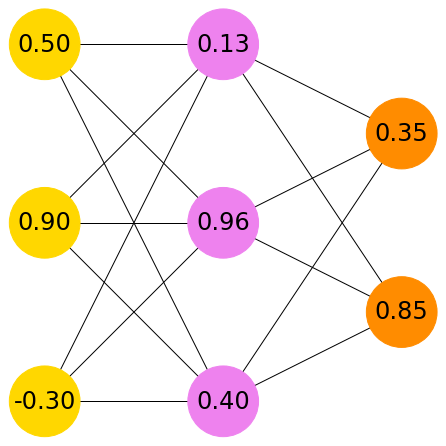

In [49]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx

subset_sizes = [3, 3, 2]
subset_color = [
    "gold",
    "violet",
    "darkorange",
]


def multilayered_graph(*subset_sizes):
    extents = nx.utils.pairwise(itertools.accumulate((0,) + subset_sizes))
    layers = [range(start, end) for start, end in extents]
    G = nx.Graph()
    for (i, layer) in enumerate(layers):
        G.add_nodes_from(layer, layer=i)
    for layer1, layer2 in nx.utils.pairwise(layers):
        G.add_edges_from(itertools.product(layer1, layer2))
    return G, layers


G, layers = multilayered_graph(*subset_sizes)

mapping = {i: '%.2f' % values[i] for i in range(8)}
H = nx.relabel_nodes(G, mapping, copy=False)

color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]
pos = nx.multipartite_layout(G, subset_key="layer")

plt.figure(figsize=(6, 6))
nx.draw(G, pos, node_color=color, with_labels=True, node_size=5000, font_size=24)
plt.axis("equal")
plt.show()

This is the process of inference, the mathematical operations that neural networks are doing all the time, to identify photos, recommending new movies or predicting the stock market. 

In [50]:
(np.random.rand(1,3)*2-1).round(1)

array([[ 0.6, -0.7,  0. ]])

## Weights, Biases and Activation Functions

Lets explore a bit the role of those 3 basic ingredients of Deep Learning

In [55]:
a = np.linspace(0,2,81)
b = np.linspace(0,2,81)

In [56]:
c = np.array(np.meshgrid(a, b)).T.reshape(-1, 2)
c.shape

(6561, 2)

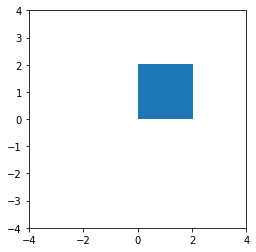

In [57]:
plt.plot(c[:,0],c[:,1],',');
axs=plt.gca()
axs.set_xlim(-4,4)
axs.set_ylim(-4,4)
axs.set_aspect('equal')

Asume that we have a $2 \times 2$ matrix. That could the the matrix for a layer that is receiving two inputs. The $x$ and $y$ coordinates.

The matrix multiply provides:

  * Scaling
  * Rotation
  * Skewing
  
Lets see the effect of a few random matrices over the points on a cube in 2D:

In [58]:
if has_latex:
    mpl.rcParams['font.size'] = 20
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

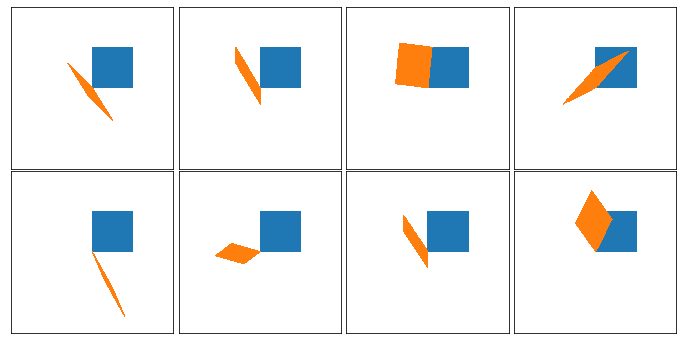

In [60]:
ncols=4
nrows=2
m = ncols*nrows*[None] 
for i in range(ncols*nrows):
    m[i] = np.round(2*np.random.rand(2,2)-np.ones((2,2)),1)

fig, axs = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(12,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
for i in range(nrows):
    for j in range(ncols):
        index = ncols*i+j
        o2 = np.dot(c, m[index])
        axs[i,j].plot(c[:,0],c[:,1],',')
        axs[i,j].plot(o2[:,0],o2[:,1],',');
        if has_latex:
            text=r'$$\begin{bmatrix}%.1f & %.1f\\%.1f & %.1f \end{bmatrix}$$'% (m[index][0,0], 
                                                                                m[index][0,1], 
                                                                                m[index][1,0], 
                                                                                m[index][1,1])
            axs[i,j].text(-3.8,2.8,text, size=14)
        axs[i,j].set_xlim(-4,4)
        axs[i,j].set_ylim(-4,4)
        axs[i,j].set_aspect('equal')
        axs[i,j].get_xaxis().set_ticks([])
        axs[i,j].get_yaxis().set_ticks([])

No matter which matrix you use, a straight line will continue to be a straigth under such operations.

The bias on the other side will produce a shift in our simple 2D case, it is very simple to see:

Imagine our original square in the range $[0.0...2.0] \times [0.0...2.0]$

In [61]:
d = c+np.array([-1.5,0.5])

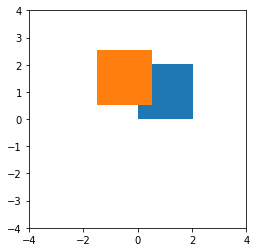

In [62]:
plt.plot(c[:,0],c[:,1],',');
plt.plot(d[:,0],d[:,1],',');
axs=plt.gca()
axs.set_xlim(-4,4)
axs.set_ylim(-4,4)
axs.set_aspect('equal')

No matter what you do with matrices and biases, neural networks will not be capable of complex transformations needed by many problems.

The rich structures that Deep Learning are able to capture comes from the non-linearity provided by the activation function. Lets see visually that those activation functions do.

In [63]:
a = np.linspace(-2,2,101)
b = np.linspace(-2,2,101)

In [64]:
c = np.array(np.meshgrid(a, b)).T.reshape(-1, 2)
c.shape

(10201, 2)

In [65]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [66]:
aa=np.sqrt(c[:,0]**2 + c[:,1]**2)
colors=(255*aa/np.max(aa)).astype(np.int32)
colors.shape

(10201,)

In [67]:
e = sigmoid(c)

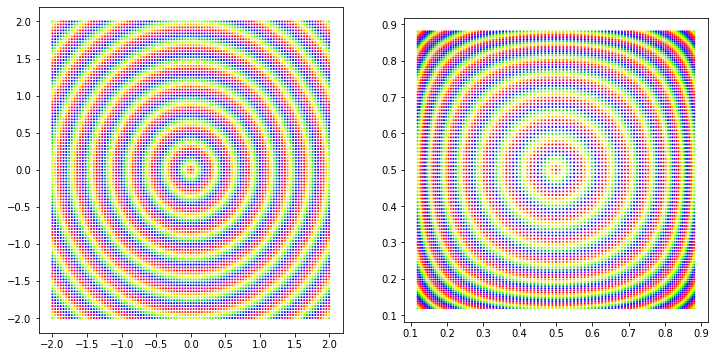

In [68]:
fig, axs = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12,6))
axs[0].scatter(c[:,0],c[:,1],s=1,c=colors, cmap='prism');
axs[1].scatter(x=e[:,0],y=e[:,1],s=1, c=colors, cmap='prism');
axs=plt.gca()
axs.set_aspect('equal')

Without the activation function, all that we are doing is matrix multiplication plus a displacement. The combination of these two operations is called an **Affine Transformation**.

Consider for example applying two a 2-layer network without any activation function.

The first layer will take the input $\mathbf{x}$ and compute:

$$\mathbf{y} = A_1\mathbf{x} + \mathbf{b_1}$$

The second layer (remember we skipping the activation function) will take the values of $\mathbf{y}$ and matrix $A'$ and biases $b'$ and compute:

$$\mathbf{z} = A_2 \mathbf{y} + \mathbf{b_2}$$

Replacing y from the first equation into the second one we have:

$$
\begin{align}
 A_2(A_1\mathbf{x} + \mathbf{b}) + \mathbf{b_2} && = && A_2(A_1\mathbf{x}) + A_2\mathbf{b_1} + \mathbf{b_2} \\
   && = && (A_2 A_1 )\mathbf{x} + (A_2\mathbf{b_1} + \mathbf{b_2}) \\
   && = && A_3 \mathbf{x} + \mathbf{b_3}
\end{align}
$$

We have found that an affine transformation of and affine transformation is equivalent to a single transformation where the linear transformation if the matrix $A_3 = A_2 A_1$ and the bias is now the product of matrices $(A_2\mathbf{b_1} + \mathbf{b_2})$.

The conclusion of this mathematical manipulations is that without activation functions, a Dense multilayer neural network, made of N layers, no matter how big or small is exactly equivalent to a single Dense layer.

This is why activation functions that looks like a minor ingredient to neneural networks are a central ingredient, not just an additive. They provide the non-linearity that those networks need to perform rich transformations.

## The process of optimization

We know with some input we can navegate the operations needed to get the output. But how we get the right weights and biases to get a network that produces the results that we want?

That is the process of optimization or training. Optimize means do something better and for knowing if something is better we need a way to tell if what we are getting now is better that what we got before. We need a function quantifies the quality of our output. 

The other element is a good procedure to induce the changes to the parameters of the network that guide us in the right direction. Without such algorithm, all that we can do is to change randomly until we get something better and continue over and over searching for a better solution. For neural networks with thousands or even millions of parameters just changing randomly will lead us nowhere. We will be having a too faint chance of improving via random gueses. 

In summary we need two new elements:

  1. Defining a **Loss Function**. This is the name of the function that quantifies for us the quality of the neural network.
  
  2. Having a **Optimization method**. A good way to lead us in the right directions of improvement.
  

### Loss Function

At the end we want that our network produces the results that we expect for them. This is clearer with Supervised Learning because we already have labels for our samples, but a loss can be equally defined in other Machine Learning situations. 

The idea of loss, is justified by the fact that we would like to minimize the errors. We can perfectly define a "Gain function", in that case what we want is to maximize the gains. Both ideas are connected with the extremalization of a function and the methods to find those extremes are called optimization methods.

For the moment, assuming a Supervised context, we can think of a loss function as any function that will compare the current results and the desired results and will produce a number that is a reflection of how far we are those results from the desired ones. 

We can think of just taking the difference like, assuming $\mathbf{x}$ being the values produced by the network and $\mathbf{y}$ the desired values, or *ground truth* values we can think about various loss function definitions.

$$\text{Loss Function} = \sum x_i - y_i$$

This is, however a bad idea, some values will be negative, others will be positive and the could compesate each other to return a very small Loss value. A better idea could be compare absolute values such as:

$$\text{Loss Function} = \sum |x_i - y_i|$$

or 

$$\text{Loss Function} = \sqrt{ \sum (x_i - y_i)^2 }$$

Lets keep the discussion at this point and move to the optimization problem.

### Optimization Methods

Finding the minimum of a function is easy if you can observe the entire function all that you have to do is evaluate the function everywhere and return the value that returned the minimum.

However, it is very unlikely you are in such situation. First, there is no way to evaluate a function on every single value when the domain is the entire reals $\mathbb{R}$ for example.

Second we are dealing with functions with too many dimensions. We are not even capable of visualizing such functions. 

There is a lucky circusntance that help us in many cases. We can ask, on a given point how the function changes locally, ie how the function changes under small changes in the parameters. The methods that we will be using take advantage of having explicit or numerical answers to the question of local changes.

Methods that uses information about how functions change in the vecinity of a point are called **Gradient-based methods**

The word gradient comes from the Latin *gradus* "a step, a pace, gait; a step climbed (on a ladder or stair);" figuratively "a step toward something, a degree of something rising by stages,".

The functions used in Neural Networks are relatively well behaved. They are continuous, smooth, the kind of functions that are good to work with. If you are blindfolded is good to know that if you give a very small step you will not fall into a cliff. That is the assurance that smooth functions offers to us. 

Consider for example the linear functions of a neural network:


$$y = \sum w_i*x_i + b_i$$

A small change in any of the $w_i$ will produce a small change in $y$, the same happens to the $b_i$.

In mathematics we say that these functions are *differentiable*. If you chain differentiable functions you continue to have a differentiable function. Not only the linear mappings of the neural network, also the activation functions and the the loss functions that we use are all of them differentiable. Small changes in the models parameters will result in small or moderate changes in the outputs. We just need the mathematical tools to find those changes through the application of functions that act on functions that act on even more functions.

The mathematical operator called the *gradient* and its value on a point offers information about how the world changes around it with changes on all the parameters. If you know the gradient, you can move the parameters all at once in a single update rather that test each one of them to see what happens.

### The concept of derivative

Lets start with a function that depends on a single parameter $x$. To offer an example consider this polynomial function:

$$f(x) = x^4 - 9x^3 + 28x^2 - 36x + 16$$

In [69]:
def f(x):
    return x**4 - 9*x**3 + 28*x**2 - 36*x + 16

In [70]:
x = np.linspace(0.5,4.2,100)

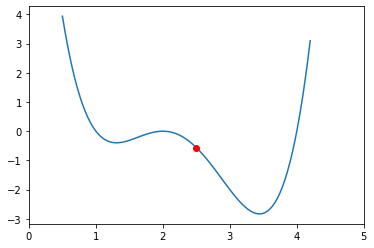

In [71]:
plt.plot(x,f(x))
plt.plot([2.5],[f(2.5)],'ro')
plt.xlim(0,5);

This clearly a smooth and nicely behave function. Smooth continues and we can see it has a minimum. But that is because you can see the plot. Imagine a small being who lives in a 2D world. It does not have access to the entire landscape. All that it knows is that it is walking on a differentiable curve, small steps will make it climb or descent by small amounts. Its position is $(x_r, y_r)$.

In mathematics, we use $\epsilon_x$ to indicate a small step, we are not saying how small, we just need to be small enough. Small so the red dot can fell confortable walking on the curve. In such condition, the curve is not longer a curve but it looks like a linear function. A function that we can approximate with:

$$f(x_r + \epsilon_x) = y_r + a \epsilon_x$$

This equation is just the translation of our words. The world looks locally flat even if globally is not. but what is the $a$ we put on that equation. For the equation of a line, that is the slope and in this case $a$ is also called the derivative of the function $f$ evaluated on the point $x_r$ where the red dot is located.

For every differentiable function such as f, there is a function that we can denote with $f'$ that when evaluated on every point of the domain will return the value of the slope for the associated function $f$. The function 

$$f(x) = x^4 - 9x^3 + 28x^2 - 36x + 16$$

is one of those differentiable functions and it derivative is the function:

$$f'(x) = 4x^3 - 27x^2 + 56x - 36$$

Differentiabilty is a blessing when we are in front of an optimization problem. The reason is evident if we plot the two functions $f$ and its derivative $f'$ on the same plot:

In [72]:
def fp(x):
    return 4*x**3 - 27*x**2 + 56*x - 36

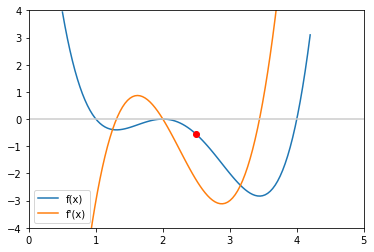

In [73]:
plt.plot(x,f(x),label='f(x)')
plt.plot(x,fp(x), label="f'(x)")
plt.plot([2.5],[f(2.5)],'ro')
plt.plot([0,5],[0,0],color='0.8')
plt.xlim(0,5);
plt.ylim(-4,4)
plt.legend();

Two important elements, the value of the derivative for the value $x_r$ is negative, that information means that if the red dot move to $x_r + \epsilon_x$ the value of $f(x_r + \epsilon_x)$ will be even lower.

The value of derivative tell us the direction of increase, ie following the oposive of that direction will lead us to a decrease. As the function has a minimum around $3.45$ following the opposite of the derivative will guide the red dot towards the minimum. 

Another important information. When the red dot reaches the minumum, the derivate will become zero, ie, it has reach a maximum or minimum, or at least a point of equilibrium. In our case a global minimum:

In [74]:
xm = (19 + np.sqrt(73))/8

In [75]:
f(xm)

-2.8334224090003204

In [76]:
fp(xm)

-2.842170943040401e-14

### The Gradient: derivatives for tensors

What about functions with many variables?

The concept of derivative can be extended to multiple variables, or to rank-2 tensors. The generalization is called the gradient.

Lets looks at one example with neural networks. 

Consider a neuron that take 3 inputs apply the linear mapping, the bias and the activation function is a sigmoid.
The following equations compute this network:

$$g(z) = \frac{1}{1 + e^{-z}}$$

$$f(\mathbf{x};\mathbf{w},b) = w_1 x_1 + w_2 x_2 + w_3 x_3 + b$$

The composition of these function will apply the sigmoid over the output of f which will take the input valued $\mathbf{x}$

$$g(f(\mathbf{x};\mathbf{w},b))$$

We are making explicit that w and b are the parameters that we want to change. The gradient is computed by taking a partial derivate, ie a derivate that assumes only one parameter changing and all other considered constant.

To be able to do we have to take advantage of some properties of derivaties. The chain rule allow us to compute a derivative by working step by step on the layers of composite functions. Like this:

$$\frac{\partial}{ \partial x} g(f(x)) = \frac{\partial g(f)}{ \partial f} \frac{\partial f(x)}{ \partial x}$$

with the derivate of a sigmoid

$$\frac{\partial}{\partial z} \frac{1}{1 + e^{-z}} = \frac{e^{-z}}{(1 + e^{-z})^2}$$

In [77]:
from sympy import diff, exp, symbols
z = symbols('z')
diff(1/(1+exp(-z)),z)

exp(-z)/(1 + exp(-z))**2

Now we need the derivatives of our linear function

$$f(\mathbf{x};\mathbf{w},b) = w_1 x_1 + w_2 x_2 + w_3 x_3 + b$$

with respect to the three $w_i$ and b. From calculus, these derivatives are simply

$$\frac{\partial}{\partial w_1} w_1 x_1 + w_2 x_2 + w_3 x_3 + b = x_1$$

$$\frac{\partial}{\partial w_2} w_1 x_1 + w_2 x_2 + w_3 x_3 + b = x_2$$

$$\frac{\partial}{\partial w_3} w_1 x_1 + w_2 x_2 + w_3 x_3 + b = x_3$$

$$\frac{\partial}{\partial b} w_1 x_1 + w_2 x_2 + w_3 x_3 + b = 1$$

These partial derivatives multiplied by the partial derivate of the sigmoid will give us 4 values.

We can say that these partial derivatives define for us the vector

$$\nabla g(f(\mathbf{x};\mathbf{w},b)) = \left(\frac{\partial g}{\partial w_1}(\mathbf{x}), \frac{\partial g}{\partial w_2}(\mathbf{x}), \frac{\partial g}{\partial w_3}(\mathbf{x}), \frac{\partial g}{\partial b}(\mathbf{x}) \right).$$

This vector is called the **gradient** of $g$ at $\mathbf{x}$. As ''g'' is differentiable at every point in some domain, then the gradient is a vector-valued function $\nabla g$ which takes the point $\mathbf{x}$ to the vector $\nabla g(\mathbf{x})$. 

This equation will give us a prescriptiong on how to change the $w$'s and $b$. The recipe is as follows:

   1. Compute the gradient at position $\mathbf{x}$ using the current values of $w$'s and $b$.
   
   2. Change the value of $w$'s and $b$ a little bit in the opposin direction of the gradient. 
      We want the change to be small, we do not want too big jumps that will radically change the next time we compute the gradient.
   
   3. Now we should have better $w$'s and $b$ that will get us closer to a minimum for $g$.

The value that we want to minimize is not the output of the neuron, but a loss function defined from it. There is an extra function we need to put in our composition, but the idea holds.

We want to minimize a *loss function* which is the result of the output of the final layer of neurons. They are the composition of an activation function over a linear function. We get a prescription to change the weights once we know the final output we should get.

Now the problem is that we do not have a single layer. So this derivation must be chained multiple times until you reach the output. The use of the paths connecting any neuron with all the others upto the final output and computing the changes that need to be done all the way up is called Back Propagation

### Backpropagation


Consider a dense layer as below: 

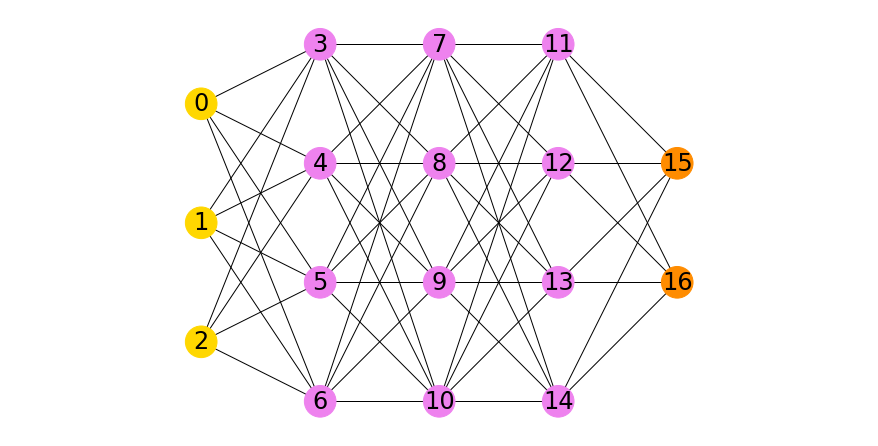

In [78]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx

subset_sizes = [3, 4, 4, 4, 2]
subset_color = [
    "gold",
    "violet",
    "violet",
    "violet",
    "darkorange",
]

def multilayered_graph(*subset_sizes):
    extents = nx.utils.pairwise(itertools.accumulate((0,) + subset_sizes))
    layers = [range(start, end) for start, end in extents]
    G = nx.Graph()
    for (i, layer) in enumerate(layers):
        G.add_nodes_from(layer, layer=i)
    for layer1, layer2 in nx.utils.pairwise(layers):
        G.add_edges_from(itertools.product(layer1, layer2))
    return G, layers


G, layers = multilayered_graph(*subset_sizes)

color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]
pos = nx.multipartite_layout(G, subset_key="layer")


plt.figure(figsize=(12, 6))
nx.draw(G, pos, node_color=color, with_labels=True, node_size=1000, font_size=24)
plt.axis("equal")
plt.show()

We have labeled the nodes in our network conveniently. On top of each node except the inputs there is a bias. We have 17 nodes, so a total of 14 biases 

In [81]:
nx.number_of_nodes(G)

17

More impressive, we have 52 edges connecting all the nodes in our network. On top of each edge there is weight.

In [82]:
nx.number_of_edges(G)

52

In a network, the chain rule that we applied before for one layer results in a lot of factors for any given weight adjustment.

Equation (6.55) from *Deep Learning* by Ian Goodfellow, Yoshua Bengio and Aaron Courville:

$$\frac{\partial u^{(n)}}{\partial u^{(j)}} = \sum_{\text{path} \; ( u^{(\pi_1)}, u^{(\pi_2)}, \cdots, u^{(\pi_t)})\\ \text{from} \, \pi_1 = j \,\text{to}\, \pi_t = n } \prod_{k=2}^t \frac{\partial u^{(\pi_k)}}{\partial u^{(\pi_{k-1})}}$$

Lets explore those paths with our example above. Imagine that we want to find the direction on which we would like to change the weight $w_{3-7}$, the weight connecting the node 3 with the node 7.

For that we need to apply the chain rule all the way to the outputs. Node 7 is connected forward with nodes [11, 12, 13,14] and eaach of them is connected with the final outputs nodes [15, 16]. The edges concerned here are:

In [83]:
import itertools

a = itertools.product(range(7,8),  range(11,15))
b = itertools.product(a,  range(15,17))

list(b)

[((7, 11), 15),
 ((7, 11), 16),
 ((7, 12), 15),
 ((7, 12), 16),
 ((7, 13), 15),
 ((7, 13), 16),
 ((7, 14), 15),
 ((7, 14), 16)]

The number of path grows exponential, just to give an idea consider the $4 \times 4 \times 2 = 32$ paths from node 3 to the final outputs $15$ and $16$

In [84]:
import itertools

a = itertools.product(range(3,4),  range(7,11))
b = itertools.product(a,  range(11,15))
c = itertools.product(b,  range(15,17))

list(c)

[(((3, 7), 11), 15),
 (((3, 7), 11), 16),
 (((3, 7), 12), 15),
 (((3, 7), 12), 16),
 (((3, 7), 13), 15),
 (((3, 7), 13), 16),
 (((3, 7), 14), 15),
 (((3, 7), 14), 16),
 (((3, 8), 11), 15),
 (((3, 8), 11), 16),
 (((3, 8), 12), 15),
 (((3, 8), 12), 16),
 (((3, 8), 13), 15),
 (((3, 8), 13), 16),
 (((3, 8), 14), 15),
 (((3, 8), 14), 16),
 (((3, 9), 11), 15),
 (((3, 9), 11), 16),
 (((3, 9), 12), 15),
 (((3, 9), 12), 16),
 (((3, 9), 13), 15),
 (((3, 9), 13), 16),
 (((3, 9), 14), 15),
 (((3, 9), 14), 16),
 (((3, 10), 11), 15),
 (((3, 10), 11), 16),
 (((3, 10), 12), 15),
 (((3, 10), 12), 16),
 (((3, 10), 13), 15),
 (((3, 10), 13), 16),
 (((3, 10), 14), 15),
 (((3, 10), 14), 16)]

The **Back propagation** algorithm is very simple in concept but computationally demanding in practice.

Since the number of paths from node j to node n grow exponentially in the lenght of these paths the number of terms in the equation above also grows exponentially with the depth of the networks.

The same computation 

$$\frac{\partial u^{(n)}}{\partial u^{(j)}}$$

will be redone many times. The usual solution is to program a temporat storage of intermediate results 

$$\frac{\partial u^{(n)}}{\partial u^{(i)}}$$

Each node in the graph has extra storage dedicated to store the gradient for that node.

Filling these table entries is crucial to avoid repeating many common subexpressions.

# Exercises


 1. **Forward propagation of a neural network**
 
    Consider a neural network with 4 layers as the input, 2 hidden layers with 3 neurons each and one final output.
    
    Assume the following weights for the hidden layers and the output. H1 is the first hidden layer an the weights and assuming the weights are in the rows of a matrix it will be $4 \times 3$
    
        H1 = [[ 0.6,  0.2,  0.2, -0.4], [ 0.2, -0.1,  0.9, -0.8], [ 0.4,  0.2,  0.7, -0.5]]
    
    For the second hidden layer it will be $3 \times 3$
    
        H2 = [[-0.3, -0.8, -0.5], [-1. , -0.9, -0.4], [-0.5, -0.1,  0. ]]
    
    The output will have just 3 values. 
    
        O1 = [0.1, 0.1, 0.7]
    
    Assume zero biases and produce the forward propagation of an input [.1, .2, .3, .4]
    
    What is the output of this network?

---

# References

There are many books about Deep Learning and many more on Machine Learning. 
This list is by no means an exhaustive list of books. I am listing the books from which I took inspiration. Also, I am listing materials where I found better ways to present topics. Often I am amazed by how people can create approachable materials for seemingly dry subjects.

The order of the books goes from divulgation and practical to the more rigorous and mathematical. Slides, blogs, and videos are those I have found over the internet or suggested by others.

### Selection of Books on Deep Learning

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Kelleher" 
       src="./fig/books/Deep Learning - Kelleher.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning<br>
      John D. Kelleher<br>
      2019<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Introduction to Deep Learning - Charniak" 
       src="./fig/books/Introduction to Deep Learning - Charniak.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Introduction to Deep Learning<br>
      Eugene Charniak<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Introduction to Deep Learning - Skansi" 
       src="./fig/books/Introduction to Deep Learning - Skansi.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Introduction to Deep Learning<br>
      Sandro Skansi<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with PyTorch - Subramanian" 
       src="./fig/books/Deep Learning with PyTorch - Subramanian.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with PyTorch<br>
      Vishnu Subramanian<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with PyTorch - Stevens" 
       src="./fig/books/Deep Learning with PyTorch - Stevens.png" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with PyTorch<br>
      Eli Stevens, Luca Artiga and Thomas Viehmann<br>
      2020<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with Python - Chollet" 
       src="./fig/books/Deep Learning with Python - Chollet.jpg" 
       height="100" width="100" />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with Python (Second Edition)<br>
      François Chollet<br>
      2021<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Patterson" 
       src="./fig/books/Deep Learning - Patterson.jpeg"
       height="100" width="100" />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning, a practitioner's approach<br>
      Josh Patterson and Adam Gibson<br>
      2017<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Goodfellow" 
       src="./fig/books/Deep Learning - Goodfellow.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning<br>
      Ian Goodfelow, Yoshua Bengio, and Aaron Courville<br>
      2016<br>
  </div>
</div>

### Interactive Books

  * [Dive into Deep Learning](https://d2l.ai/index.html)<br>
    Interactive deep learning book with code, math, and discussions<br> 
    Implemented with PyTorch, NumPy/MXNet, and TensorFlow<br>
    Adopted at 300 universities from 55 countries


### Slides

  * John Urbanic's ["Deep Learning in one Afternoon"](https://www.psc.edu/wp-content/uploads/2022/04/Deep-Learning.pdf)<br>
An excellent fast, condensed introduction to Deep Learning.<br>
John is a Parallel Computing Scientist at Pittsburgh Supercomputing Center

  * [Christopher Olah's Blog](http://colah.github.io) is very good. For example about [Back Propagation](http://colah.github.io/posts/2015-08-Backprop)

  * Adam W. Harley on his CMU page offers [An Interactive Node-Link Visualization of Convolutional Neural Networks](https://www.cs.cmu.edu/~aharley/vis/)



### Jupyter Notebooks

 * [Yale Digital Humanities Lab](https://github.com/YaleDHLab/lab-workshops)
 
 * Aurelein Geron Hands-on Machine Learning with Scikit-learn 
   [First Edition](https://github.com/ageron/handson-ml) and
   [Second Edition](https://github.com/ageron/handson-ml2)
   
 * [A progressive collection notebooks of the Machine Learning course by the University of Turin](https://github.com/rugantio/MachineLearningCourse)
   
 * [A curated set of jupyter notebooks about many topics](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
   
### Videos

 * [Caltech's "Learning from Data" by Professor Yaser Abu-Mostafa](https://work.caltech.edu/telecourse.html)
 
 * [3Blue1Brown Youtube Channel](https://www.youtube.com/watch?v=Ilg3gGewQ5U)
 
 ---

# Back of the Book

In [ ]:
n = chapter_number
t = np.linspace(0, (2*(n-1)+1)*np.pi/2, 1000)
x = t*np.cos(t)**3
y = 9*t*np.sqrt(np.abs(np.cos(t))) + t*np.sin(0.3*t)*np.cos(2*t)
plt.plot(x, y, c="green")
plt.axis('off');

In [ ]:
end = time.time()
print(f'Chapter {chapter_number} took {int(end - start):d} seconds')